# Programming Assignment 2: Metropolis Hastings Algorithm
Submitted By: Deepak Mewada

Rollno: 20CS91P02

Mail id: deepakmewada96@kgpian.iitkgp.ac.in
###Instructions
Consider a mixture of K bivariate Gaussian distributions. The mixing weights are same for all the Gaussians. The mean of the i-th Gaussian is [ 2i, 3i ], and its covariance matrix is diagonal with value = 0.5xsqrt(i) for both dimensions. We would like to draw n samples from this GMM and plot them in 2D. We use the Metropolis-Hastings algorithm for this purpose, with a Gaussian proposal distribution with variance sigma. Write a code to generate these samples. The parameters n, K, sigma, as user inputs. Plot the samples in 2D. Generate a report showing the plots for different values of K, sigma, and n = 100. In the report, you may also show the trace plot of the first dimension.

In the code, I ignore the min(1, x) term for the alpha calculation, and just calculate P(x') / P(x), because we only care about whether or not the ratio is bigger than some uniform random number [0, 1], so when P(x') / P(x) > 1, it will then always satisfy the test just as P(x') / P(x) = 1, calculated from the min(1, x) term.

##Step 1: Importing All Dependencies

In [ ]:
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import random
from scipy.stats import multivariate_normal


##Step 2: Defining Bivariate Gaussian

In [ ]:
def pdf_bivariate_gaussian(x, i):
	mu = [2*i, 3*i]
	covariance = [[0.5*np.sqrt(i), 0], [0, 0.5*np.sqrt(i)]]
	return multivariate_normal.pdf(x, mean = mu, cov = covariance)



##Step 3: Making Bivariate Gaussian Mixture by adding bivariate Gaussians

In [ ]:
def pdf_bivariate_gaussian_mixture(x, K):
	mixture = 0
	for i in range(1, K + 1):
		mixture += (1/K) * pdf_bivariate_gaussian(x, i)
	return mixture

##Step 4: Defining Metropolish-Hasting Function
The MH function accepts sampling function (here Bivariate GM) ,sigma value for proposal distribution and no of iterations.
This MH function will return list of accepted and rejected sample from our sampling function i.e Gaussian Mixture here.

In [ ]:
    
def metropolis_hastings(p,sigma=0.3,k=3, iter=100):
  x = [0.,0.]
  samples = np.zeros((iter, 2))
  accepted = []
  rejected = []   
  for i in range(iter):
       
       x0=random.normalvariate(x[0], sigma)
       x1=random.normalvariate(x[1], sigma)
       x_next=[x0,x1]       
       if np.random.rand() < p(x_next,k) / p(x,k):
          x= x_next
          accepted.append(x_next)
       else:
          rejected.append(x_next)   
       
  return np.array(accepted), np.array(rejected)


##Step 5: Taking User Input for Desired Values

In [ ]:
K = int(input("Enter the total number of bivariate Gaussian Distributions you want in the mixture (K): "))
sigma_inp = float(input("Enter the standard deviation for Proposal Distribution (sigma): "))
n = int(input("Enter the number of samples you want to take out of GM (n): "))

Enter the total number of bivariate Gaussian Distributions you want in the mixture (K): 3
Enter the standard deviation for Proposal Distribution (sigma): 3
Enter the number of samples you want to take out of GM (n): 50000


##Step 6: Run the algorithm with input parameters and collect accepted and rejected samples


In [241]:

if __name__ == '__main__':
  accepted, rejected = metropolis_hastings(pdf_bivariate_gaussian_mixture,sigma=sigma_inp,k=K,iter=n)


##Step 7: Plotting accepted/rejected sample from sampling distribution on graph (x0 vs x1 values)
Green dots showing accepted samples and bar graph showing trace plot.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


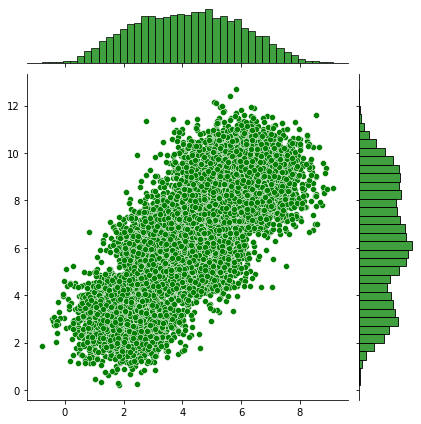

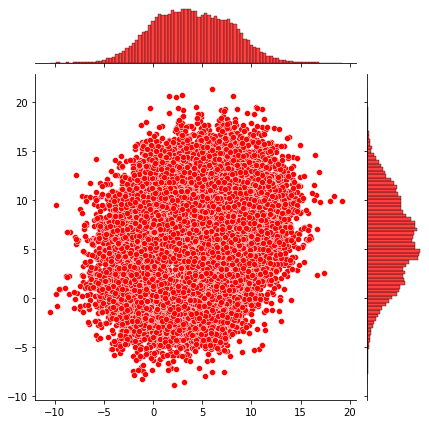

In [242]:
  sns.jointplot(accepted[:, 0], accepted[:, 1],color="green") 
  sns.jointplot(rejected[:, 0], rejected[:, 1],color="red") 

#**PLOTS**
####Here we plot accepted and rejected samples and see how the algorithem converges

(1073, 2)

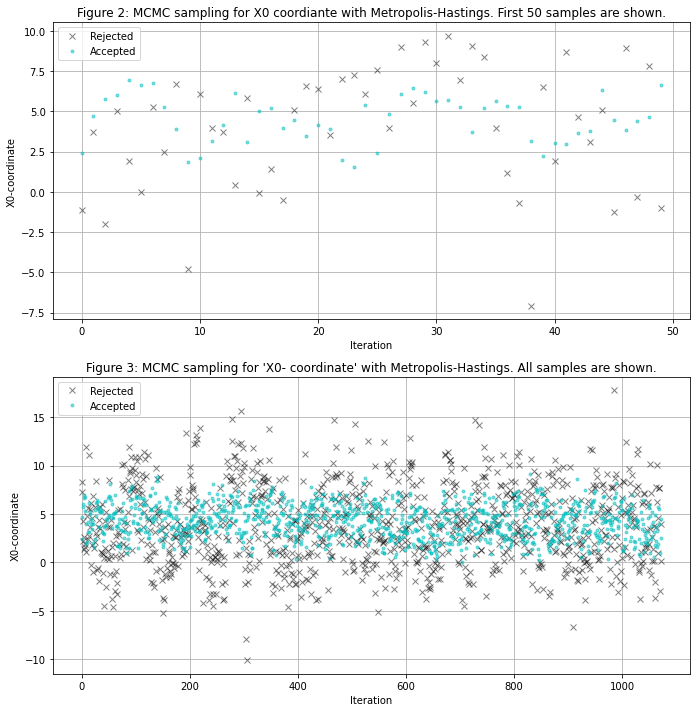

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,0], 'kx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,0], 'c.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("X0-coordinate")
ax.set_title("Figure 2: MCMC sampling for X0 coordiante with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,0], 'kx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,0], 'c.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("X0-coordinate")
ax2.set_title("Figure 3: MCMC sampling for 'X0- coordinate' with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

##PLOTS
###Let's visualize the trace of X and the histogram of the trace.
We consider the initial 25% of the values of X to be "burn-in", so we drop them.


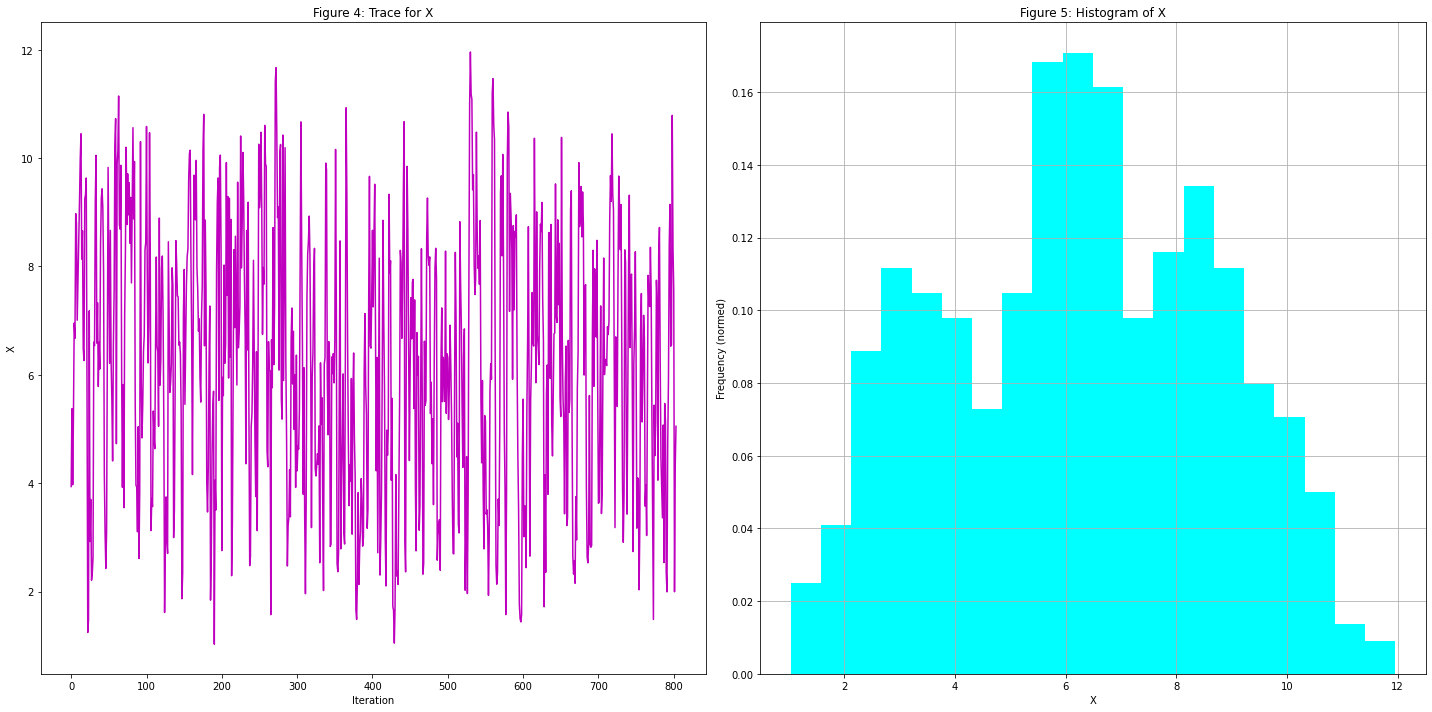

In [ ]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1],'m')
ax.set_title("Figure 4: Trace for X")
ax.set_ylabel("X")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True,color="cyan")
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("X")
ax.set_title("Figure 5: Histogram of X")
fig.tight_layout()


ax.grid("off")

#PLOT
##As with the  example, let's see how the algorithm worked its way to these values:

Text(0.5, 1.0, 'Figure 8: MCMC sampling for $x0$ and $x1$ with Metropolis-Hastings. Last 50 samples are shown.')

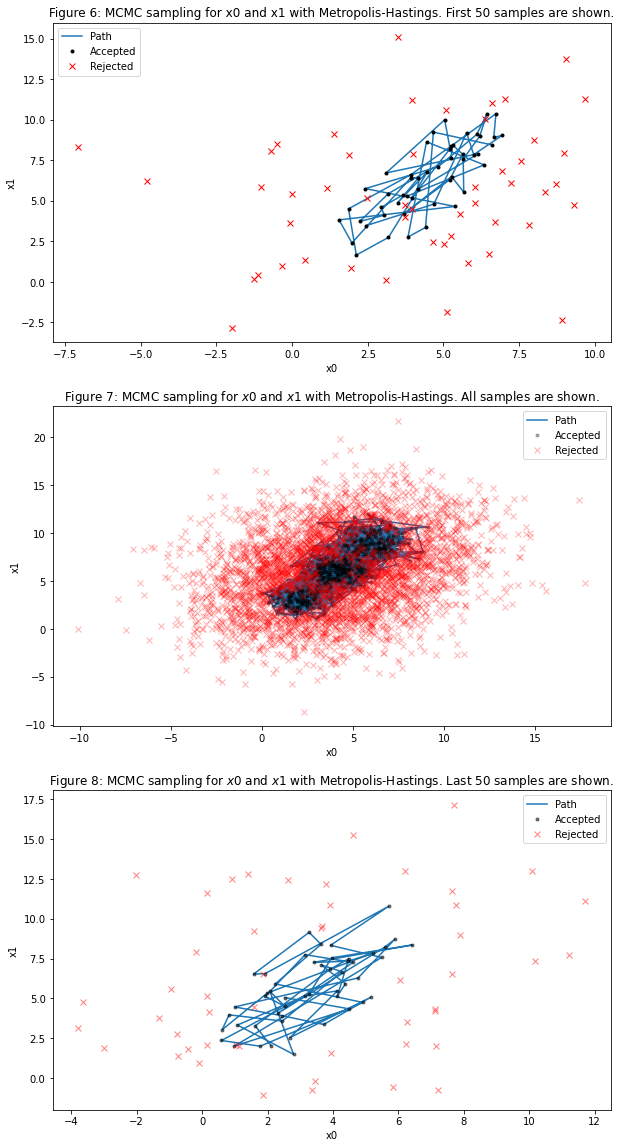

In [ ]:

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'k.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
ax.set_title("Figure 6: MCMC sampling for x0 and x1 with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'k.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
ax.set_title("Figure 7: MCMC sampling for $x0$ and $x1$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'k.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
ax.set_title("Figure 8: MCMC sampling for $x0$ and $x1$ with Metropolis-Hastings. Last 50 samples are shown.")

#Visualising the traces of x0 and x1 and the histogram of the traces.
We consider the initial 50% of the values of x0 and x1 to be "burn-in", so we drop them.


Text(0.5, 1.0, '2D histogram showing the joint distribution of $x0$ and $x1$')

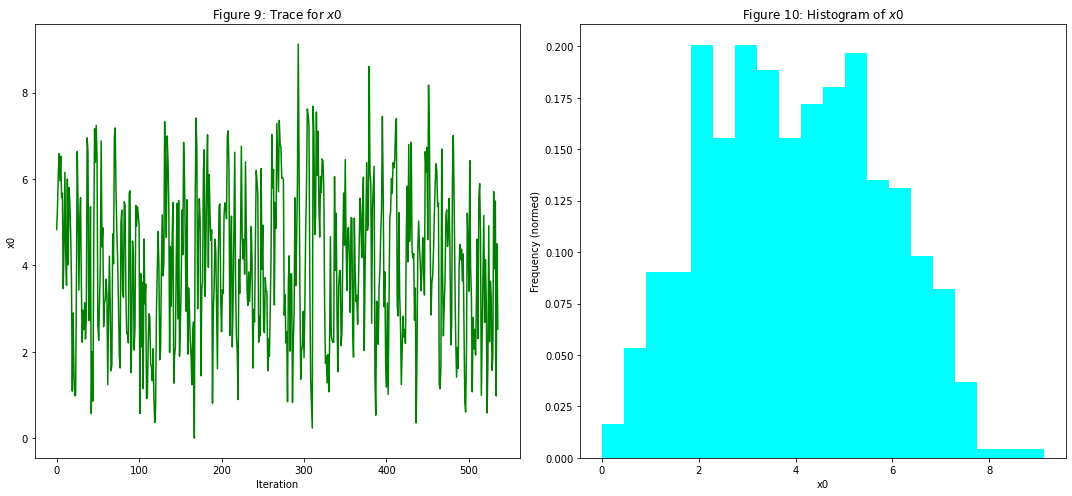

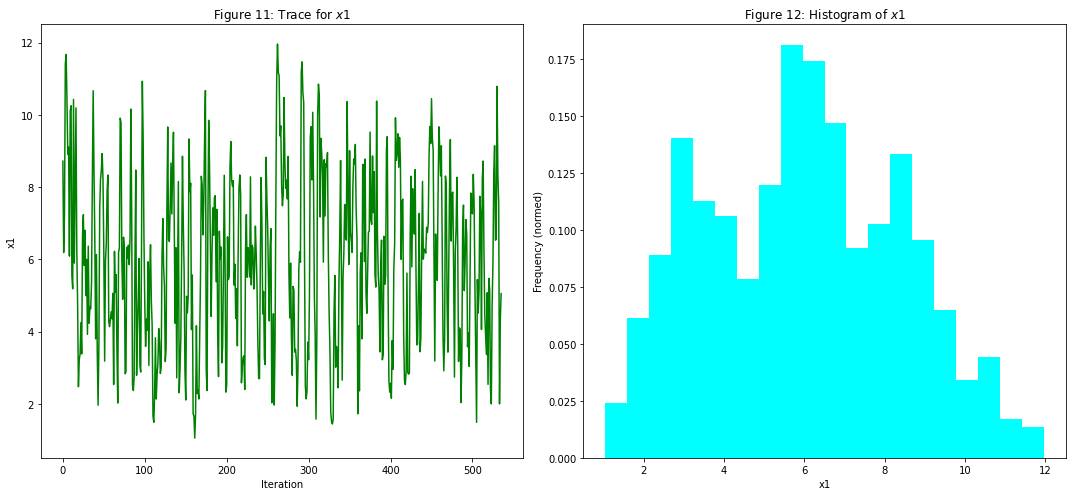

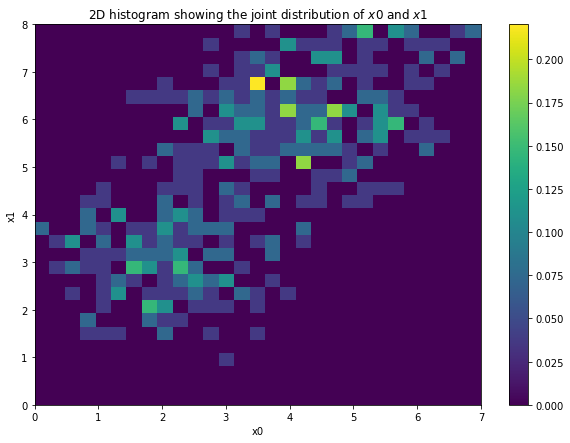

In [ ]:

show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0],'g')
ax.set_title("Figure 9: Trace for $x0$")
ax.set_xlabel("Iteration")
ax.set_ylabel("x0")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True,color="cyan")
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("x0")
ax.set_title("Figure 10: Histogram of $x0$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1],'g')
ax.set_title("Figure 11: Trace for $x1$")
ax.set_xlabel("Iteration")
ax.set_ylabel("x1")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True,color="cyan")
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("x1")
ax.set_title("Figure 12: Histogram of $x1$")
fig.tight_layout()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
xbins, ybins = np.linspace(0,7,30), np.linspace(0,8,30)
counts, xedges, yedges, im = ax.hist2d(accepted[hist_show:,0], accepted[hist_show:,1], density=True, bins=[xbins, ybins])
ax.set_xlabel("x0")
ax.set_ylabel("x1")
fig.colorbar(im, ax=ax)
ax.set_title("2D histogram showing the joint distribution of $x0$ and $x1$")

###Conclusion

While the abstraction behind this algorithm may seem out of grasp at first, the implementation is actually pretty simple, and gives awesome results. In fact, the great thing about probabilistic programming, notably MCMC is that we only need to write down the model and then run it. There is no need to compute evidence, or ensure some constraining mathematical properties.